In [3]:
import math
import pickle
import sklearn
import numpy as np
%load_ext cudf.pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/wind project/final data ERA5 24 hours.xlsx")

In [5]:
data


,# date,lat,lon,soil_temp,temp,solar_rd,u10,v10,soil_temp.1,temp.1,...,wind speed.3,Unnamed: 43,Unnamed: 44,solar_rd.4,u10.4,v10.4,soil_temp.5,temp.5,pressure.4,wind speed.4
0,2011-01-01,14.5,77.5,293.431,292.019,1.961410e+07,0.155315,1.399950,20.281,18.869,...,2.566997,NaN,NaN,1.961410e+07,0.155315,1.399950,20.281,18.869,95848.4,1.502179
1,2011-01-01,14.5,77.5,293.063,291.975,1.862650e-09,0.114499,1.303050,19.913,18.825,...,3.115833,NaN,NaN,1.862650e-09,0.114499,1.303050,19.913,18.825,95901.0,1.064268
2,2011-01-01,14.5,77.5,293.102,292.538,1.086020e+05,-0.272937,1.208260,19.952,19.388,...,3.408713,NaN,NaN,1.086020e+05,-0.272937,1.208260,19.952,19.388,95997.9,0.747660
3,2011-01-01,14.5,77.5,295.555,295.004,8.415560e+05,-0.401350,1.049350,22.405,21.854,...,3.495023,NaN,NaN,8.415560e+05,-0.401350,1.049350,22.405,21.854,96101.7,0.779042
4,2011-01-01,14.5,77.5,299.023,297.310,2.294920e+06,-0.516890,0.721392,25.873,24.160,...,3.752448,NaN,NaN,2.294920e+06,-0.516890,0.721392,25.873,24.160,96141.0,1.262038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95684,2021-11-30,14.5,77.5,295.158,294.168,1.327630e+07,-2.551080,NaN,22.008,21.018,...,NaN,NaN,NaN,1.327630e+07,-2.551080,NaN,22.008,21.018,NaN,NaN
95685,2021-11-30,14.5,77.5,295.109,294.074,1.327630e+07,-2.560500,NaN,21.959,20.924,...,NaN,NaN,NaN,1.327630e+07,-2.560500,NaN,21.959,20.924,NaN,NaN
95686,2021-11-30,14.5,77.5,295.131,294.094,1.327630e+07,-2.294890,NaN,21.981,20.944,...,NaN,NaN,NaN,1.327630e+07,-2.294890,NaN,21.981,20.944,NaN,NaN
95687,2021-11-30,14.5,77.5,295.089,294.012,1.327630e+07,-2.214200,NaN,21.939,20.862,...,NaN,NaN,NaN,1.327630e+07,-2.214200,NaN,21.939,20.862,NaN,NaN


In [6]:
df3h=data[["temp.2",'soil_temp.2','solar_rd.1','pressure.1','u10.1','v10.1',"wind speed.1"]]

In [7]:
df3h

,temp.2,soil_temp.2,solar_rd.1,pressure.1,u10.1,v10.1,wind speed.1
0,18.869,20.281,1.961410e+07,95848.4,0.155315,1.399950,1.123484
1,18.825,19.913,1.862650e-09,95901.0,0.114499,1.303050,0.887458
2,19.388,19.952,1.086020e+05,95997.9,-0.272937,1.208260,0.636728
3,21.854,22.405,8.415560e+05,96101.7,-0.401350,1.049350,0.922119
4,24.160,25.873,2.294920e+06,96141.0,-0.516890,0.721392,1.553067
...,...,...,...,...,...,...,...
95684,21.018,22.008,1.327630e+07,NaN,-2.551080,NaN,2.214200
95685,20.924,21.959,1.327630e+07,NaN,-2.560500,NaN,2.057840
95686,20.944,21.981,1.327630e+07,NaN,-2.294890,NaN,NaN
95687,20.862,21.939,1.327630e+07,NaN,-2.214200,NaN,NaN


In [8]:
df3h=df3h[:90000]

In [9]:
df3h.describe()

,temp.2,soil_temp.2,solar_rd.1,pressure.1,u10.1,v10.1,wind speed.1
count,90000.000000,90000.000000,9.000000e+04,90000.000000,90000.000000,90000.000000,90000.000000
mean,26.931202,29.515442,1.444083e+07,95947.575214,0.739724,0.222411,3.202760
std,4.775821,6.720845,8.239108e+06,327.585181,3.256255,1.226050,1.563794
min,12.844000,15.024000,0.000000e+00,94864.100000,-7.145060,-6.181590,0.011003
25%,23.611000,24.697000,7.611002e+06,95699.500000,-2.160270,-0.624168,2.050907
50%,26.443000,28.004000,1.626740e+07,95935.200000,0.334119,0.336138,3.038441
75%,29.953000,32.925000,2.121330e+07,96194.500000,3.672690,1.103350,4.167724
max,41.062000,53.178000,2.793320e+07,97050.100000,10.352300,6.817320,10.352305


In [10]:
df3h.isnull().sum()

,0
temp.2,0
soil_temp.2,0
solar_rd.1,0
pressure.1,0
u10.1,0
v10.1,0
wind speed.1,0


In [11]:
x=df3h.iloc[:,:-1]
y=df3h.iloc[:,-1:]

In [12]:
x

,temp.2,soil_temp.2,solar_rd.1,pressure.1,u10.1,v10.1
0,18.869,20.281,1.961410e+07,95848.4,0.155315,1.399950
1,18.825,19.913,1.862650e-09,95901.0,0.114499,1.303050
2,19.388,19.952,1.086020e+05,95997.9,-0.272937,1.208260
3,21.854,22.405,8.415560e+05,96101.7,-0.401350,1.049350
4,24.160,25.873,2.294920e+06,96141.0,-0.516890,0.721392
...,...,...,...,...,...,...
89995,28.539,30.224,2.664550e+07,96100.9,-1.218290,1.445450
89996,27.429,29.224,2.664550e+07,96033.7,-0.356766,1.823630
89997,26.702,28.486,2.664550e+07,95951.3,0.283099,1.986080
89998,25.731,27.599,2.664550e+07,95884.4,1.402390,2.070490


In [13]:
y

,wind speed.1
0,1.123484
1,0.887458
2,0.636728
3,0.922119
4,1.553067
...,...
89995,2.500725
89996,2.794666
89997,2.847885
89998,2.462561


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=False)

In [15]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [16]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [17]:
x_train_scaled.shape

(63000, 6)

In [18]:

model=Sequential()

# Input layer + First hidden layer
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(BatchNormalization())  # Normalize the activations
model.add(Dropout(0.2))  # Dropout to reduce overfitting

# Second hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Third hidden layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fourth hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fifth hidden layer (optional, to add more depth)
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,569 (334.25 KB)

 Trainable params: 84,289 (329.25 KB)

 Non-trainable params: 1,280 (5.00 KB)

In [21]:
history= model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=100, batch_size=512)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 3.0529 - mean_absolute_error: 3.0529 - val_loss: 1.5641 - val_mean_absolute_error: 1.5641
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 1.5599 - mean_absolute_error: 1.5599 - val_loss: 0.8161 - val_mean_absolute_error: 0.8161
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0103 - mean_absolute_error: 1.0103 - val_loss: 0.6819 - val_mean_absolute_error: 0.6819
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8813 - mean_absolute_error: 0.8813 - val_loss: 0.6283 - val_mean_absolute_error: 0.6283
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8292 - mean_absolute_error: 0.8292 - val_loss: 0.6198 - val_mean_absolute_error: 0.6198
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7789 - mean_absolute_error: 0.7789 - val_loss: 0.6025 - val_mean_absolute_error: 0.6025
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7481 - mean_absolute_error: 0.7481 - val_lo

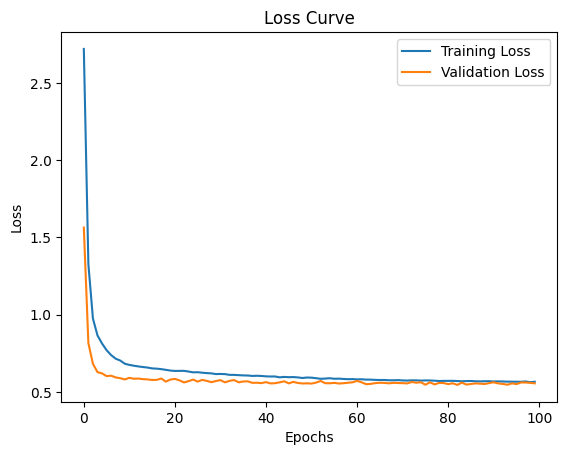

In [22]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
predictions=model.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [24]:
mse,mae=model.evaluate(x_test_scaled,y_test)
print("mean squared error",mse)
print("mean absolute error",mae)

844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6023 - mean_absolute_error: 0.6023
mean squared error 0.5764936804771423
mean absolute error 0.5764936804771423


In [25]:
rmse=math.sqrt(mse)
rmse

0.7592718093523178

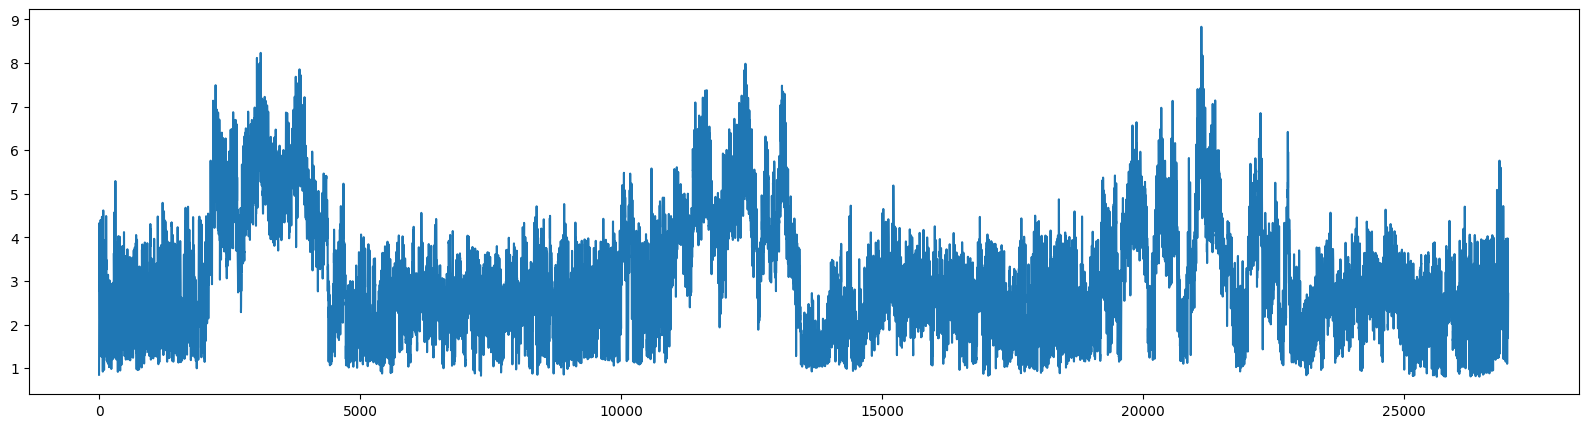

In [26]:
plt.figure(figsize=(20,5))
plt.plot(predictions)


In [27]:
pred3=pd.DataFrame(predictions)


In [28]:
pred3.to_csv('predictions3h.csv')

In [29]:
y_test.to_csv('test_values 3h.csv')

In [30]:
import pickle

In [31]:
with open('ann3h.pickle','wb') as f3:
  pickle.dump(model,f3)

In [32]:
with open('ann3h.pickle','rb') as f3:
  fm3=pickle.load(f3)


In [33]:
predictions3=fm3.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [34]:

mse=mean_squared_error(y_test,predictions3)
print("MSE:",mse)
mae=mean_absolute_error(y_test, predictions3)
print("MAE:",mae)
rmse=math.sqrt(mse)
print("RMSE :",rmse)
r2=r2_score(y_test,predictions3)
print("r2 coeffient :",r2)

MSE: 0.5790423808061629
MAE: 0.5764936847325279
RMSE : 0.760948343060265
r2 coeffient : 0.7591479889884104


In [35]:
print(np.shape(y_test))
np.shape(predictions3)

(27000, 1)


(27000, 1)

wind speed for next 6 hours

In [36]:
df6h=data[["temp.3",'soil_temp.3','solar_rd.2','pressure.2','u10.2','v10.2',"wind speed.2"]]

In [37]:
df6h

,temp.3,soil_temp.3,solar_rd.2,pressure.2,u10.2,v10.2,wind speed.2
0,18.869,20.281,1.961410e+07,95848.4,0.155315,1.399950,0.922119
1,18.825,19.913,1.862650e-09,95901.0,0.114499,1.303050,1.553067
2,19.388,19.952,1.086020e+05,95997.9,-0.272937,1.208260,1.851348
3,21.854,22.405,8.415560e+05,96101.7,-0.401350,1.049350,1.940464
4,24.160,25.873,2.294920e+06,96141.0,-0.516890,0.721392,1.946160
...,...,...,...,...,...,...,...
95684,21.018,22.008,1.327630e+07,NaN,-2.551080,NaN,NaN
95685,20.924,21.959,1.327630e+07,NaN,-2.560500,NaN,NaN
95686,20.944,21.981,1.327630e+07,NaN,-2.294890,NaN,NaN
95687,20.862,21.939,1.327630e+07,NaN,-2.214200,NaN,NaN


In [38]:
df6h=df6h[:90000]

In [39]:
x=df6h.iloc[:,:-1]
y=df6h.iloc[:,-1:]

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=False)

In [41]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [42]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [43]:
x_train_scaled.shape

(63000, 6)

In [44]:


model=Sequential()
# Input layer + First hidden layer
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(BatchNormalization())  # Normalize the activations
model.add(Dropout(0.2))  # Dropout to reduce overfitting

# Second hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Third hidden layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fourth hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fifth hidden layer (optional, to add more depth)
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,569 (334.25 KB)

 Trainable params: 84,289 (329.25 KB)

 Non-trainable params: 1,280 (5.00 KB)

In [47]:
history= model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=100,batch_size=512)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - loss: 3.0833 - mean_absolute_error: 3.0833 - val_loss: 1.9216 - val_mean_absolute_error: 1.9216
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6092 - mean_absolute_error: 1.6092 - val_loss: 0.9237 - val_mean_absolute_error: 0.9237
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0661 - mean_absolute_error: 1.0661 - val_loss: 0.8625 - val_mean_absolute_error: 0.8625
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9634 - mean_absolute_error: 0.9634 - val_loss: 0.7504 - val_mean_absolute_error: 0.7504
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8997 - mean_absolute_error: 0.8997 - val_loss: 0.7255 - val_mean_absolute_error: 0.7255
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8620 - mean_absolute_error: 0.8620 - val_loss: 0.7252 - val_mean_absolute_error: 0.7252
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8347 - mean_absolute_error: 0.8347 - val_lo

In [48]:
predictions=model.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [49]:
mse,mae=model.evaluate(x_test_scaled,y_test)
print("mean squared error",mse)
print("mean absolute error",mae)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7391 - mean_absolute_error: 0.7391
mean squared error 0.7176178097724915
mean absolute error 0.7176178097724915


In [50]:
rmse=math.sqrt(mse)
rmse

0.8471232553604531

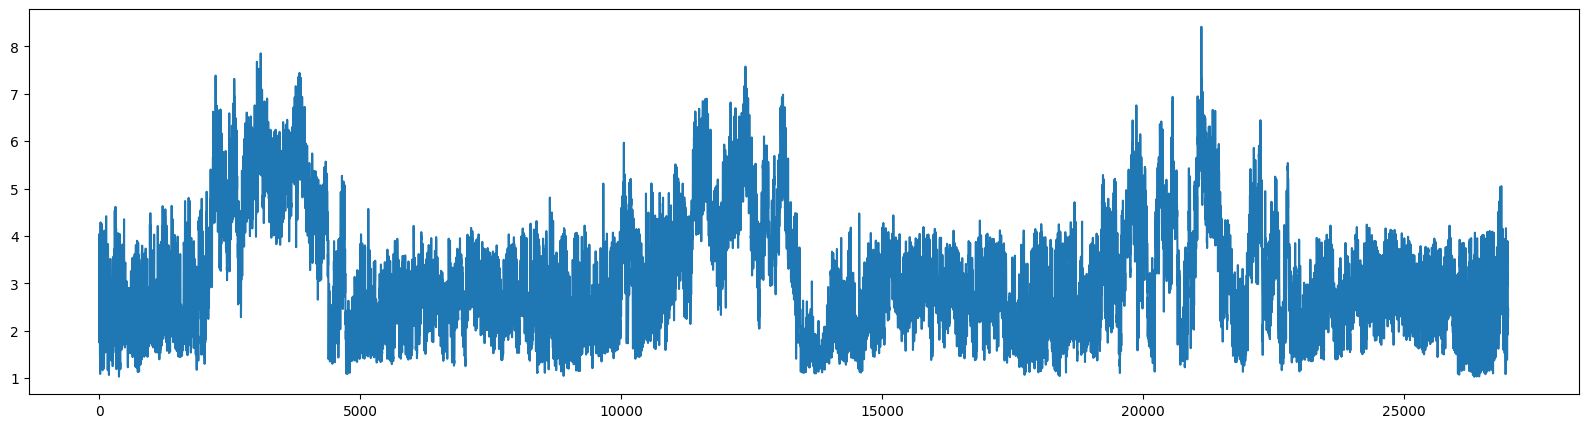

In [51]:
plt.figure(figsize=(20,5))
plt.plot(predictions)

In [52]:
pred6h=pd.DataFrame(predictions)

In [53]:
pred6h.to_csv('ann predctions 6h.csv',index=False)
y_test.to_csv('ann test_values 6h.csv',index=False)

In [55]:
with open('ann6h.pickle','wb') as f6:
  pickle.dump(model,f6)

In [56]:
with open('ann6h.pickle','rb') as f6:
  fm6=pickle.load(f6)

In [57]:
predictions6=fm6.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [58]:

mse=mean_squared_error(y_test,predictions6)
print("MSE:",mse)

mae=mean_absolute_error(y_test, predictions6)
print("MAE:",mae)

rmse=math.sqrt(mse)
print("RMSE :",rmse)

r2=r2_score(y_test,predictions6)
print("r2 coeffient :",r2)

MSE: 0.8770982814400319
MAE: 0.7176178413124258
RMSE : 0.9365352537091339
r2 coeffient : 0.6351391665770325


12 hours wind prediction

In [59]:
df12h=data[["temp.4",'soil_temp.4','solar_rd.3','pressure.3','u10.3','v10.3',"wind speed.3"]]
df12h

,temp.4,soil_temp.4,solar_rd.3,pressure.3,u10.3,v10.3,wind speed.3
0,18.869,20.281,1.961410e+07,95848.4,0.155315,1.399950,2.566997
1,18.825,19.913,1.862650e-09,95901.0,0.114499,1.303050,3.115833
2,19.388,19.952,1.086020e+05,95997.9,-0.272937,1.208260,3.408713
3,21.854,22.405,8.415560e+05,96101.7,-0.401350,1.049350,3.495023
4,24.160,25.873,2.294920e+06,96141.0,-0.516890,0.721392,3.752448
...,...,...,...,...,...,...,...
95684,21.018,22.008,1.327630e+07,NaN,-2.551080,NaN,NaN
95685,20.924,21.959,1.327630e+07,NaN,-2.560500,NaN,NaN
95686,20.944,21.981,1.327630e+07,NaN,-2.294890,NaN,NaN
95687,20.862,21.939,1.327630e+07,NaN,-2.214200,NaN,NaN


In [60]:
df12h=df12h[:90000]
x=df12h.iloc[:,:-1]
y=df12h.iloc[:,-1:]

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=False)

In [62]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [63]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [64]:


model=Sequential()

# Input layer + First hidden layer
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(BatchNormalization())  # Normalize the activations
model.add(Dropout(0.2))  # Dropout to reduce overfitting

# Second hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Third hidden layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fourth hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fifth hidden layer (optional, to add more depth)
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [66]:
history= model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=100, batch_size=512)

Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - loss: 3.0875 - mean_absolute_error: 3.0875 - val_loss: 1.7781 - val_mean_absolute_error: 1.7781
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.6489 - mean_absolute_error: 1.6489 - val_loss: 0.9982 - val_mean_absolute_error: 0.9982
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1300 - mean_absolute_error: 1.1300 - val_loss: 0.8345 - val_mean_absolute_error: 0.8345
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0258 - mean_absolute_error: 1.0258 - val_loss: 0.8018 - val_mean_absolute_error: 0.8018
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9706 - mean_absolute_error: 0.9706 - val_loss: 0.7820 - val_mean_absolute_error: 0.7820
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9268 - mean_absolute_error: 0.9268 - val_loss: 0.7758 - val_mean_absolute_error: 0.7758
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8919 - mean_absolute_error: 0.8919 - val_lo

In [67]:
predictions=model.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [68]:
mse,mae=model.evaluate(x_test_scaled,y_test)
print("mean squared error",mse)
print("mean absolute error",mae)

rmse=math.sqrt(mse)
rmse

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8019 - mean_absolute_error: 0.8019
mean squared error 0.7725188732147217
mean absolute error 0.7725188732147217


0.8789305280935017

In [69]:
pred12h=pd.DataFrame(predictions)



In [70]:
pred12h.to_csv("ann predictions 12h.csv")
y_test.to_csv('ann y_test 12h.csv')


0    1.354122
dtype: float32 0    9.066334
dtype: float32


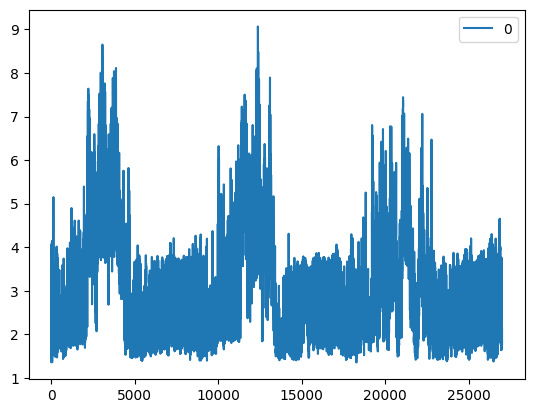

In [71]:
pred12h.plot()
print(pred12h.min(),pred12h.max())

<Axes: >

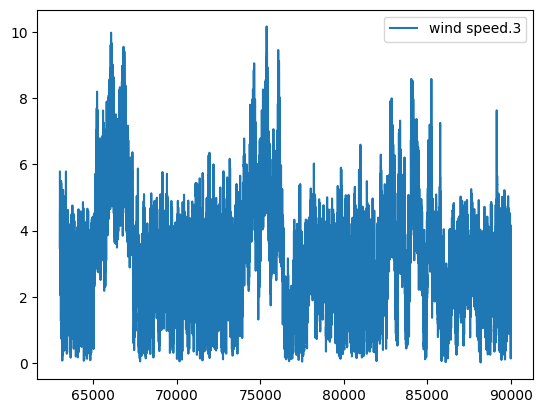

In [72]:
y_test.plot()

In [73]:
print(y_test.min(),y_test.max())

wind speed.3    0.012229
dtype: float64 wind speed.3    10.171284
dtype: float64


In [75]:
with open('aan12h.pickle','wb') as f12:
  pickle.dump(model,f12)

In [76]:
with open('aan12h.pickle','rb') as f12:
  fm12=pickle.load(f12)

In [77]:
predictions12=fm12.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [78]:
mse,mae=fm12.evaluate(x_test_scaled,y_test)
print("mean squared error",mse)
print("mean absolute error",mae)

rmse=math.sqrt(mse)
rmse

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8019 - mean_absolute_error: 0.8019
mean squared error 0.7725188732147217
mean absolute error 0.7725188732147217


0.8789305280935017

In [79]:
mse=mean_squared_error(y_test,predictions12)
print("MSE:",mse)

mae=mean_absolute_error(y_test, predictions12)
print("MAE:",mae)

rmse=math.sqrt(mse)
print("RMSE :",rmse)

r2=r2_score(y_test,predictions12)
print("r2 coeffient :",r2)

MSE: 0.9839183960638658
MAE: 0.7725195214796488
RMSE : 0.9919266082043902
r2 coeffient : 0.5907503165779384


In [80]:

df24h=data[["temp.4",'soil_temp.4','solar_rd.3','pressure.3','u10.3','v10.3',"wind speed.4"]]
df24h

,temp.4,soil_temp.4,solar_rd.3,pressure.3,u10.3,v10.3,wind speed.4
0,18.869,20.281,1.961410e+07,95848.4,0.155315,1.399950,1.502179
1,18.825,19.913,1.862650e-09,95901.0,0.114499,1.303050,1.064268
2,19.388,19.952,1.086020e+05,95997.9,-0.272937,1.208260,0.747660
3,21.854,22.405,8.415560e+05,96101.7,-0.401350,1.049350,0.779042
4,24.160,25.873,2.294920e+06,96141.0,-0.516890,0.721392,1.262038
...,...,...,...,...,...,...,...
95684,21.018,22.008,1.327630e+07,NaN,-2.551080,NaN,NaN
95685,20.924,21.959,1.327630e+07,NaN,-2.560500,NaN,NaN
95686,20.944,21.981,1.327630e+07,NaN,-2.294890,NaN,NaN
95687,20.862,21.939,1.327630e+07,NaN,-2.214200,NaN,NaN


In [81]:

df24h=df24h[:90000]
x=df24h.iloc[:,:-1]
y=df24h.iloc[:,-1:]

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=False)


In [83]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [84]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [85]:


model=Sequential()
# Input layer + First hidden layer
model.add(Dense(64, input_dim=6, activation='relu'))
model.add(BatchNormalization())  # Normalize the activations
model.add(Dropout(0.2))  # Dropout to reduce overfitting

# Second hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Third hidden layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fourth hidden layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fifth hidden layer (optional, to add more depth)
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [86]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])


In [87]:
history= model.fit(x_train_scaled,y_train,validation_split=0.2,epochs=100, batch_size=512)


Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 3.0636 - mean_absolute_error: 3.0636 - val_loss: 1.6534 - val_mean_absolute_error: 1.6534
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5587 - mean_absolute_error: 1.5587 - val_loss: 0.8520 - val_mean_absolute_error: 0.8520
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0366 - mean_absolute_error: 1.0366 - val_loss: 0.7435 - val_mean_absolute_error: 0.7435
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9172 - mean_absolute_error: 0.9172 - val_loss: 0.6725 - val_mean_absolute_error: 0.6725
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8503 - mean_absolute_error: 0.8503 - val_loss: 0.6704 - val_mean_absolute_error: 0.6704
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8150 - mean_absolute_error: 0.8150 - val_loss: 0.6623 - val_mean_absolute_error: 0.6623
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7778 - mean_absolute_error: 0.7778 - val_lo

In [88]:

predictions=model.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [89]:

mse,mae=model.evaluate(x_test_scaled,y_test)
print("mean squared error",mse)
print("mean absolute error",mae)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7051 - mean_absolute_error: 0.7051
mean squared error 0.684619665145874
mean absolute error 0.684619665145874


In [90]:

rmse=math.sqrt(mse)
rmse

0.8274174672714337

In [91]:
pred24h=pd.DataFrame(predictions)


In [92]:
pred24h.to_csv("ann predictions 24h.csv")
y_test.to_csv('ann y_test 24h.csv')

In [93]:

with open('aan24h.pickle','wb') as f24:
  pickle.dump(model,f24)



In [94]:
with open('aan24h.pickle','rb') as f24:
  fm24=pickle.load(f24)

In [95]:
predictions24=fm24.predict(x_test_scaled)

844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [96]:
mse=mean_squared_error(y_test,predictions24)
print("MSE:",mse)

mae=mean_absolute_error(y_test, predictions24)
print("MAE:",mae)

rmse=math.sqrt(mse)
print("RMSE :",rmse)

r2=r2_score(y_test,predictions24)
print("r2 coeffient :",r2)

MSE: 0.7746075523555174
MAE: 0.6846194402614176
RMSE : 0.8801179195741429
r2 coeffient : 0.6778476991381447
